In [45]:
import pandas as pd
import seaborn as sns
import numpy as np
% matplotlib inline

In [31]:
def load_data(fname):
    with open(fname, "r") as f:
        # ignore `vertices: ...` at head and `Total: ..` at tail
        raws = f.readlines()[1:-1]
    header = [i.strip() for i in raws[0].split(',')]
    lines = [[j.strip() for j in i.split(',')] for i in raws[1:]]
    t = pd.DataFrame.from_records(lines, columns=header)
    res = t[header].apply(pd.to_numeric, errors='ignore')
    res['k'] = res['idx'].apply(lambda x: int(x.split('/')[-1]))
    res['idx'] = res['idx'].apply(lambda x: int(x.split('/')[0]))
    return res[res.k > 0]

In [32]:
df = load_data("polys300_pts500.txt")

In [33]:
df.head()

,idx,dist_ki,dist_edbt,cost_ki,cost_edbt,vnum_ki,vnum_edbt,k
1,0,1652.50,1652.50,50.189,56246.6,2,2,1
2,0,2831.19,2831.19,50.189,56246.6,2,2,2
3,0,3387.30,3387.30,50.189,56246.6,5,5,3
4,0,3547.90,3547.90,50.189,56246.6,2,2,4
6,1,1674.26,1674.26,97.978,266494.0,2,2,1


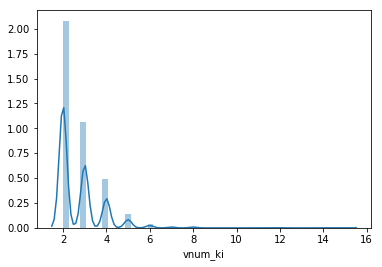

In [40]:
sns.distplot(df.vnum_ki)

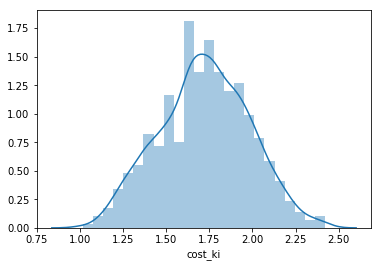

In [47]:
sns.distplot(np.log10(df.cost_ki))

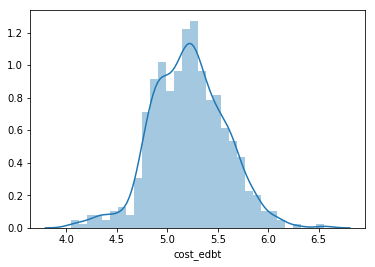

In [46]:
sns.distplot(np.log10(df.cost_edbt))